THis is the imports

```python
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
```

In [1]:
import streamlit as st 

ModuleNotFoundError: No module named 'streamlit'

# Display code
mycode = """
df = pd.read_csv("Live_AIS_data.csv")
df.head()
"""
st.code(mycode,language='python')

In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
# pd.set_option('display.max_width', 2000)

In [2]:
# sample_code = """df = pd.read_csv("Live_AIS_data.csv")
# df.head()"""

# st.code(sample_code)


df = pd.read_csv("Live_AIS_data.csv")
df.head()

,MMSI,IMO,SHIP_ID,LAT,LON,SPEED,HEADING,COURSE,STATUS,TIMESTAMP,...,NEXT_PORT_ID,NEXT_PORT_UNLOCODE,NEXT_PORT_NAME,NEXT_PORT_COUNTRY,ETA_CALC,ETA_UPDATED,DISTANCE_TO_GO,DISTANCE_TRAVELLED,AVG_SPEED,MAX_SPEED
0,228253000,0,5,45.60551,-1.775635,37.0,67,243.0,99.0,2024-07-29T13:57:50,...,NaN,NaN,NaN,NaN,NaN,NaN,0,247,7.3,9.6
1,246836000,9628855,19,52.92190,2.395917,29.0,21,39.0,3.0,2024-07-29T13:57:26,...,NaN,NaN,NaN,NaN,NaN,NaN,0,245,5.3,6.1
2,228263700,9364980,50,49.05777,-3.990243,215.0,359,359.0,0.0,2024-07-29T13:57:34,...,429.0,GBPLY,PLYMOUTH,GB,2024-07-29T17:51:00,2024-07-29T13:29:00,70,20,13.6,14.6
3,228263900,0,68,49.16305,-4.073606,21.0,511,261.0,7.0,2024-07-29T13:57:41,...,NaN,NaN,NaN,NaN,NaN,NaN,0,42,7.0,10.4
4,228264000,8546050,69,50.04624,1.122012,86.0,511,65.0,3.0,2024-07-29T13:57:38,...,3883.0,FRTJE,TROUVILLE-SUR-MER,FR,NaN,NaN,0,66,7.5,7.8


Numerical Columns (Can Have Averages Calculated):

MMSI, IMO, SHIP_ID, LAT, LON, SPEED, HEADING, COURSE, STATUS, UTC_SECONDS, LENGTH, WIDTH, GRT, DWT, DRAUGHT, YEAR_BUILT, ROT, ETA_CALC, DISTANCE_TO_GO, DISTANCE_TRAVELLED, AVG_SPEED, MAX_SPEED

Categorical Columns (Can Have Modes Calculated):

TIMESTAMP, DSRC, MARKET, SHIPNAME, SHIPTYPE, CALLSIGN, FLAG, TYPE_NAME, AIS_TYPE_SUMMARY, DESTINATION, LAST_PORT, LAST_PORT_TIME, LAST_PORT_ID, LAST_PORT_UNLOCODE, LAST_PORT_COUNTRY, CURRENT_PORT, CURRENT_PORT_ID, CURRENT_PORT_UNLOCODE, CURRENT_PORT_COUNTRY, NEXT_PORT_ID, NEXT_PORT_UNLOCODE, NEXT_PORT_NAME, NEXT_PORT_COUNTRY, ETA_UPDATED

Mean: 20.441695592979187, Standard Deviation: 42.97447673700893


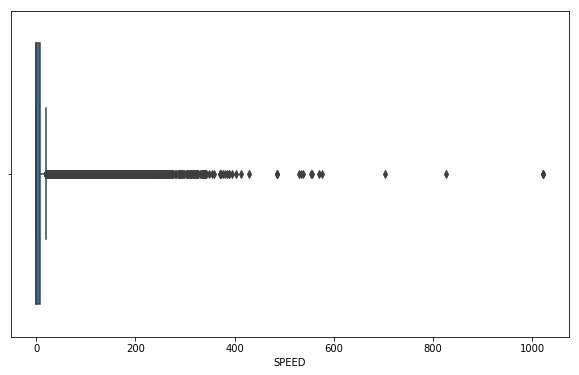

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'column_name' is the column of interest
mean_value = df['SPEED'].mean()
std_dev = df['SPEED'].std()

# Print mean and standard deviation
print(f"Mean: {mean_value}, Standard Deviation: {std_dev}")

# Box plot for 'column_name'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SPEED'])
plt.show()

# Scatter plot matrix for exploratory pairwise relationships
# sns.pairplot(df[['SPEED', 'MAX_SPEED']])
# plt.show()

The standard deviation of 42.97447673700893 units measures the dispersion or variability of the speed values around the mean. A high standard deviation relative to the mean indicates a wide spread of speed values, suggesting significant variability in the speeds observed.

Variability: 

With a standard deviation nearly twice the size of the mean, the speed values are quite spread out. This implies that there is considerable variation in the speeds recorded, with some entities moving much faster or slower than the average speed.
Outliers Impact: 

A large standard deviation relative to the mean might indicate the presence of outliers significantly affecting the average speed. Given the high standard deviation, it's plausible that there are some exceptionally fast or slow speeds skewing the overall average.

Mean: 10.78652401306183, Standard Deviation: 24.43117817262913


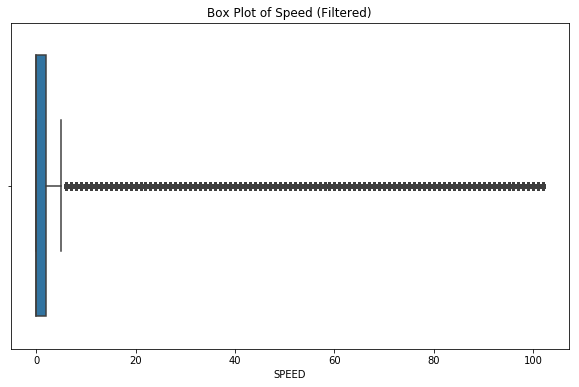

In [11]:
# Filter out speeds over 102.2 knots
no_one_o_two_df = df.loc[df['SPEED'] <= 102.2]

# Perform analysis on the filtered dataset
mean_value = no_one_o_two_df['SPEED'].mean()
std_dev = no_one_o_two_df['SPEED'].std()

# Print mean and standard deviation
print(f"Mean: {mean_value}, Standard Deviation: {std_dev}")

# Box plot for 'SPEED' in the filtered dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=no_one_o_two_df['SPEED'])
plt.title('Box Plot of Speed (Filtered)')
plt.show()

With the mean speed of 10.78652401306183 knots and a standard deviation of 24.43117817262913 knots, after omitting all speeds above 102.2 knots, we can draw several conclusions about the speed distribution in your dataset:

Mean Speed

Lower Mean Speed: The mean speed is significantly lower than the previously discussed global mean of approximately 20.44 knots. This suggests that the dataset primarily contains slower-moving vessels or that the inclusion of extremely high-speed values artificially inflated the mean speed in the initial analysis.
Realistic Mean Speed: A mean speed of around 10.79 knots seems more realistic for many types of vessels, including cargo ships, passenger ferries, and even some types of recreational boats. This could indicate that the dataset is focused on a variety of vessels that do not reach the very high speeds associated with specialized racing yachts or military vessels.

Standard Deviation

Moderate Variability: The standard deviation of 24.43 knots indicates a moderate level of variability in the speeds among the vessels in your dataset. This suggests that while the mean speed is relatively consistent, there is still a significant spread in the speeds observed, with some vessels moving considerably faster or slower than the average.
Impact of Omitting High-Speed Values: The reduction in the standard deviation compared to the initial analysis (where the mean was higher) suggests that the high-speed values contributed significantly to the variability in the dataset. By removing these values, the remaining data shows a more concentrated distribution around the mean speed.

Interpretation

Overall, these results suggest that the dataset primarily consists of slower-moving vessels, with a moderate spread in speeds. The exclusion of speeds above 102.2 knots has resulted in a dataset that better reflects the typical speeds of the vessels being analyzed, potentially focusing on commercial or recreational vessels rather than high-performance craft.

In [4]:
avg_speed = df['SPEED'].mean()
print(f"Average Speed: {avg_speed}")

Average Speed: 20.441695592979187


In [5]:
ship_name_mode = df['SHIPNAME'].mode()[0]
print(f"Mode of Ship Name: {ship_name_mode}")

Mode of Ship Name: ORION


In [6]:
type_name_mode = df['TYPE_NAME'].mode()[0]
print(f"Mode of Type Name: {type_name_mode}")

Mode of Type Name: Pleasure Craft


In [7]:
ais_type_smmry_mode = df['AIS_TYPE_SUMMARY'].mode()[0]
print(f"Mode of AIS Type Summary Name: {ais_type_smmry_mode}")

Mode of AIS Type Summary Name: Cargo


In [4]:
df.describe()

,MMSI,IMO,SHIP_ID,LAT,LON,SPEED,HEADING,COURSE,STATUS,UTC_SECONDS,SHIPTYPE,LENGTH,WIDTH,GRT,DWT,DRAUGHT,YEAR_BUILT,ROT,L_FORE,W_LEFT,LAST_PORT_ID,CURRENT_PORT_ID,NEXT_PORT_ID,DISTANCE_TO_GO,DISTANCE_TRAVELLED,AVG_SPEED,MAX_SPEED
count,8.513700e+04,8.513700e+04,8.513700e+04,85137.000000,85137.000000,81529.000000,85137.000000,69901.000000,85097.000000,71393.000000,85137.000000,85087.000000,85084.000000,34291.000000,28938.000000,85082.000000,39460.000000,32944.000000,84731.000000,84731.000000,80386.000000,52625.000000,45778.000000,85137.000000,85137.000000,79647.000000,81510.000000
mean,3.789302e+08,3.591154e+06,3.034526e+06,34.075577,30.163115,20.441696,330.194428,167.729675,36.307825,28.895816,58.224215,71.054297,13.297773,17359.146248,29045.680247,33.223937,2002.503928,-0.217581,45.316932,6.258949,7415.239818,8217.657995,6325.008061,92.407285,818.386119,8.864734,10.915451
std,1.760488e+08,4.508652e+06,3.013939e+06,22.118742,73.492663,42.974477,189.962195,111.607158,45.343688,17.400758,27.412204,83.862396,12.684069,30605.630177,51450.685223,38.600518,15.973717,16.223863,62.291218,6.638533,8597.626746,9131.895836,8242.922729,587.262966,2982.744342,5.555039,6.276111
min,2.000000e+00,0.000000e+00,5.000000e+00,-63.562050,-179.938200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1874.000000,-708.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.100000,0.000000
25%,2.448710e+08,0.000000e+00,3.663870e+05,26.186910,-0.683342,0.000000,160.000000,67.000000,0.000000,14.000000,36.000000,15.000000,5.000000,472.500000,1000.000000,0.000000,1997.000000,0.000000,7.000000,2.000000,769.000000,768.000000,532.000000,0.000000,12.000000,6.300000,7.700000
50%,3.552450e+08,0.000000e+00,7.843300e+05,37.637390,13.909670,0.000000,341.000000,172.000000,5.000000,29.000000,57.000000,36.000000,9.000000,3104.000000,5815.000000,24.000000,2007.000000,0.000000,14.000000,4.000000,2428.000000,2429.000000,1736.000000,0.000000,55.000000,7.800000,10.100000
75%,4.190928e+08,9.247168e+06,5.962168e+06,51.118920,113.141700,8.000000,511.000000,264.000000,99.000000,44.000000,70.000000,97.000000,16.600000,23577.000000,37977.500000,52.000000,2012.000000,0.000000,66.000000,8.000000,17380.000000,18758.000000,16146.000000,0.000000,359.000000,9.900000,13.300000
max,1.000000e+09,9.999890e+06,8.908000e+06,79.205700,179.900100,1022.000000,511.000000,511.000000,99.000000,98.000000,255.000000,1022.000000,126.000000,237000.000000,441893.000000,255.000000,2024.000000,643.000000,511.000000,63.000000,26289.000000,26289.000000,26286.000000,18687.000000,39999.000000,590.000000,198.000000


In [5]:
df.nunique()

MMSI                     85100
IMO                      33797
SHIP_ID                  85137
LAT                      83387
LON                      80510
SPEED                      336
HEADING                    361
COURSE                     362
STATUS                      20
TIMESTAMP                  723
DSRC                         3
UTC_SECONDS                 61
MARKET                      13
SHIPNAME                 75933
SHIPTYPE                   203
CALLSIGN                 66598
FLAG                       193
LENGTH                    8052
WIDTH                     2445
GRT                      11834
DWT                      15102
DRAUGHT                    238
YEAR_BUILT                 132
SHIP_COUNTRY               194
SHIP_CLASS                  26
ROT                         99
TYPE_NAME                  285
AIS_TYPE_SUMMARY            15
DESTINATION              20576
ETA                      13112
L_FORE                     351
W_LEFT                      63
LAST_POR

In [6]:
df.columns

Index(['MMSI', 'IMO', 'SHIP_ID', 'LAT', 'LON', 'SPEED', 'HEADING', 'COURSE',
       'STATUS', 'TIMESTAMP', 'DSRC', 'UTC_SECONDS', 'MARKET', 'SHIPNAME',
       'SHIPTYPE', 'CALLSIGN', 'FLAG', 'LENGTH', 'WIDTH', 'GRT', 'DWT',
       'DRAUGHT', 'YEAR_BUILT', 'SHIP_COUNTRY', 'SHIP_CLASS', 'ROT',
       'TYPE_NAME', 'AIS_TYPE_SUMMARY', 'DESTINATION', 'ETA', 'L_FORE',
       'W_LEFT', 'LAST_PORT', 'LAST_PORT_TIME', 'LAST_PORT_ID',
       'LAST_PORT_UNLOCODE', 'LAST_PORT_COUNTRY', 'CURRENT_PORT',
       'CURRENT_PORT_ID', 'CURRENT_PORT_UNLOCODE', 'CURRENT_PORT_COUNTRY',
       'NEXT_PORT_ID', 'NEXT_PORT_UNLOCODE', 'NEXT_PORT_NAME',
       'NEXT_PORT_COUNTRY', 'ETA_CALC', 'ETA_UPDATED', 'DISTANCE_TO_GO',
       'DISTANCE_TRAVELLED', 'AVG_SPEED', 'MAX_SPEED'],
      dtype='object')

In [7]:
df.dtypes

MMSI                       int64
IMO                        int64
SHIP_ID                    int64
LAT                      float64
LON                      float64
SPEED                    float64
HEADING                    int64
COURSE                   float64
STATUS                   float64
TIMESTAMP                 object
DSRC                      object
UTC_SECONDS              float64
MARKET                    object
SHIPNAME                  object
SHIPTYPE                   int64
CALLSIGN                  object
FLAG                      object
LENGTH                   float64
WIDTH                    float64
GRT                      float64
DWT                      float64
DRAUGHT                  float64
YEAR_BUILT               float64
SHIP_COUNTRY              object
SHIP_CLASS                object
ROT                      float64
TYPE_NAME                 object
AIS_TYPE_SUMMARY          object
DESTINATION               object
ETA                       object
L_FORE    

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85137 entries, 0 to 85136
Data columns (total 51 columns):
MMSI                     85137 non-null int64
IMO                      85137 non-null int64
SHIP_ID                  85137 non-null int64
LAT                      85137 non-null float64
LON                      85137 non-null float64
SPEED                    81529 non-null float64
HEADING                  85137 non-null int64
COURSE                   69901 non-null float64
STATUS                   85097 non-null float64
TIMESTAMP                85137 non-null object
DSRC                     85137 non-null object
UTC_SECONDS              71393 non-null float64
MARKET                   82062 non-null object
SHIPNAME                 85136 non-null object
SHIPTYPE                 85137 non-null int64
CALLSIGN                 69274 non-null object
FLAG                     83859 non-null object
LENGTH                   85087 non-null float64
WIDTH                    85084 non-null flo

In [9]:
df['GRT'].value_counts()

499.0       444
498.0       187
749.0       143
2999.0       96
294.0        86
299.0        77
199.0        74
496.0        71
497.0        65
250.0        64
495.0        56
298.0        53
33044.0      51
168.0        51
149.0        49
1678.0       48
197.0        47
144.0        46
100.0        44
490.0        43
327.0        43
493.0        43
268.0        42
492.0        41
198.0        41
293.0        40
150.0        39
32987.0      39
142.0        36
140.0        36
235.0        36
381.0        36
260.0        36
119.0        36
2997.0       35
2998.0       35
172.0        35
200.0        35
131.0        34
147.0        34
194.0        34
1599.0       34
110.0        34
494.0        34
484.0        34
236.0        34
2545.0       33
748.0        33
130.0        32
169.0        32
181.0        32
9981.0       32
120.0        32
399.0        32
998.0        32
365.0        31
312.0        31
332.0        31
296.0        31
248.0        31
196.0        31
179.0        30
186.0   

In [10]:
df['DWT'].value_counts()

100.0       138
200.0       135
49999.0      91
50.0         88
150.0        75
350.0        73
500.0        71
4999.0       65
250.0        64
1000.0       63
1700.0       59
4000.0       59
1600.0       58
1500.0       58
1200.0       56
300.0        54
5000.0       49
3200.0       49
2500.0       48
4500.0       48
3500.0       47
110.0        44
90.0         44
1.0          43
40.0         43
3000.0       42
25.0         41
30.0         41
65.0         40
160.0        40
800.0        40
20.0         40
125.0        40
850.0        40
120.0        40
190.0        39
49990.0      37
180.0        36
400.0        36
1400.0       36
220.0        35
134.0        34
60.0         33
2000.0       33
600.0        32
2100.0       32
1650.0       32
80.0         31
130.0        31
1800.0       30
900.0        29
57000.0      29
52.0         29
700.0        29
450.0        28
650.0        28
140.0        27
240.0        27
3700.0       26
46.0         25
112.0        25
63500.0      25
81.0    

In [11]:
df['FLAG'].value_counts()

CN    12946
US     7829
NL     6074
NO     4007
GB     3263
PA     3150
DE     3076
LR     2317
FR     1962
MH     1925
IT     1921
JP     1911
SE     1631
DK     1535
MT     1534
ES     1458
SG     1386
TR     1233
KR     1200
CA     1196
AU     1129
ID     1128
RU      893
VN      892
HK      882
PT      816
BE      802
GR      728
KY      628
BR      604
BS      579
CY      574
MY      559
IS      528
FI      477
HR      422
IN      415
AE      410
AG      403
TW      399
SA      391
PL      366
VC      329
AR      255
NZ      235
BZ      233
IE      228
NG      225
BB      224
PW      221
CH      215
TH      209
CL      209
KN      184
FO      177
RO      171
MX      171
PH      169
CK      169
QA      165
ZA      163
VU      151
IR      150
LU      146
EE      136
KM      121
GI      120
EC      116
SL      114
TZ      109
TG      108
LK      107
VG      105
HU       98
CO       94
JM       93
UY       88
BG       88
AT       87
CM       84
LV       82
PY       81
AZ       79
PE  

In [12]:
len(df)

85137

In [32]:
df['LAST_PORT'].value_counts()

SHANGHAI                1157
SINGAPORE                767
NANJING                  635
ZHOUSHAN                 622
NANTONG                  464
SHIPU                    439
YANGZHOU                 422
TIANJIN                  376
ANTWERP                  331
AMSTERDAM                315
ZHENJIANG                302
NINGBO                   299
JIANGYIN                 270
HUIZHOU                  270
CAOFEIDIAN               269
IJMUIDEN                 267
HONG KONG                254
HOUSTON                  233
HAMBURG                  226
NEW ORLEANS              223
ZHANGJIAGANG             218
BUSAN                    218
XIAMEN                   213
NANSHA                   206
JINGJIANG                201
TAICANG                  186
MINHANG                  184
TERNEUZEN                178
FOURCHON                 173
NEW YORK                 170
LIANYUNGANG              169
DAMMAM                   168
YEOSU                    168
LANSHAN                  163
FUJAIRAH      

In [14]:
df['CURRENT_PORT'].value_counts()

SHANGHAI                845
AMSTERDAM               482
ANTWERP                 425
SHIPU                   422
SINGAPORE               399
ZHOUSHAN                391
NANTONG                 363
HAMBURG                 267
NANJING                 264
SINGAPORE ANCH          264
HUIZHOU                 264
HOUSTON                 251
NEW ORLEANS             240
YANGZHOU                221
NEW YORK                194
HONG KONG               189
NINGBO                  183
ISTANBUL                178
ROTTERDAM WAALHAVEN     178
CAOFEIDIAN              175
DAMMAM                  174
CJK                     168
BUSAN                   168
SEATTLE                 164
SAN DIEGO               159
TIANJIN                 149
CONSTANTA               143
TAIZHOU                 141
XIAMEN                  140
KAOHSIUNG               139
QUANZHOU                139
FOURCHON                134
XINHUI                  127
ZHANJIANG               126
FUJAIRAH ANCH           123
DUBAI               

In [15]:
df['NEXT_PORT_NAME'].value_counts()

SHANGHAI                847
SINGAPORE               673
ZHOUSHAN                619
ROTTERDAM               616
ANTWERP                 406
AMSTERDAM               393
NINGBO                  334
NANTONG                 325
HAMBURG                 268
BUSAN                   256
TIANJIN                 229
FUJAIRAH                220
NEW YORK                219
TAIZHOU                 213
NANJING                 198
CONSTANTA               191
TAICANG                 187
HONG KONG               186
HOUSTON                 183
CAOFEIDIAN              180
SINGAPORE ANCH          165
ZHENJIANG               155
PIRAEUS                 153
SANTOS                  152
JIANGYIN                145
YEOSU                   144
ULSAN                   142
LAS PALMAS              134
KAOHSIUNG               133
XIAMEN                  128
FOURCHON                128
HARLINGEN               124
NEW ORLEANS             122
CJK                     121
ALGECIRAS               119
QINGDAO             

In [16]:
df['LAST_PORT_UNLOCODE'].value_counts()


CNSHG    1157
SGSIN     767
CNNJG     635
CNZOS     622
CNNTG     464
CNXSP     439
CNYZH     422
CNTXG     376
BEANR     331
NLAMS     315
CNZHE     302
CNNBG     299
CNHUI     270
CNCFD     269
NLIJM     267
CNJIA     258
HKHKG     254
USHOU     233
DEHAM     226
USMSY     223
CNZJG     218
KRPUS     218
CNXMG     213
CNNSA     206
CNTSI     201
CNTAC     186
CNMNG     184
NLTNZ     178
USFOC     173
USNYC     170
CNLYG     169
SADMM     168
KRYOS     168
CNLSN     163
AEFJR     158
ROCND     157
NLRTM     156
CNXIN     155
NLBOT     154
NLWAL     154
CNTZO     153
CNYIZ     152
ESPMI     150
CNTGS     150
NLHAR     150
QARLF     147
CNLHE     147
BRSSZ     147
CNQZJ     144
CNQDG     144
NLMSV     143
CNDGY     139
TWKHH     138
CNHUH     138
USORF     137
USSEA     136
CNTOL     134
CNFAN     134
ESLPA     134
CNZHA     131
RULED     130
CNSHP     128
CNLKU     127
CNBAY     126
BRRIO     125
RUNVS     125
NOTOS     125
AEDXB     125
CNYJI     124
KRUSN     124
USSAN     123
IDJKT 

In [17]:
sorted_value_counts = df['LENGTH'].value_counts().sort_values(ascending=False)
sorted_value_counts

12.00      3303
0.00       2737
10.00      2407
15.00      2350
11.00      2259
14.00      2246
13.00      2095
16.00      1395
20.00      1323
18.00      1186
17.00      1092
24.00      1010
2.00        978
9.00        922
19.00       917
30.00       867
22.00       836
26.00       812
8.00        809
23.00       799
110.00      757
21.00       715
32.00       684
40.00       653
25.00       614
27.00       566
28.00       542
189.99      514
50.00       488
35.00       480
4.00        466
36.00       462
6.00        430
33.00       427
80.00       426
34.00       425
38.00       417
45.00       410
7.00        403
60.00       396
29.00       384
39.00       380
53.00       380
183.00      378
55.00       357
31.00       340
37.00       320
42.00       318
229.00      314
135.00      309
85.00       308
49.00       307
86.00       298
44.00       296
511.00      292
63.00       285
67.00       268
70.00       253
48.00       250
225.00      246
54.00       235
43.00       233
65.00   

In [33]:
sorted_value_counts_df = df['LENGTH'].value_counts().reset_index(name='counts')
sorted_value_counts_df.sort_values(by='index', ascending=False, inplace=True)
sorted_value_counts_df

,index,counts
271,1022.00,24
6778,897.00,1
3072,893.00,2
4853,892.00,1
4052,883.00,2
6548,877.00,1
7523,859.00,1
7635,858.00,1
4136,851.00,2
5180,850.00,1


In [19]:
# TYPE_NAME	AIS_TYPE_SUMMARY	DESTINATION
df['AIS_TYPE_SUMMARY'].value_counts()

Cargo                20977
Pleasure Craft       10646
Fishing              10241
Tanker                8007
Special Craft         7769
Sailing Vessel        7667
Tug                   6998
Passenger             5294
Navigation Aid        2992
Other                 1625
Unspecified           1080
High Speed Craft       631
Search and Rescue      572
VTS                    384
Wing in Grnd            95
Name: AIS_TYPE_SUMMARY, dtype: int64

In [20]:
filtered_df = df[df['TYPE_NAME'] == 'Ro-Ro/Container Carrier']
filtered_df

,MMSI,IMO,SHIP_ID,LAT,LON,SPEED,HEADING,COURSE,STATUS,TIMESTAMP,DSRC,UTC_SECONDS,MARKET,SHIPNAME,SHIPTYPE,CALLSIGN,FLAG,LENGTH,WIDTH,GRT,DWT,DRAUGHT,YEAR_BUILT,SHIP_COUNTRY,SHIP_CLASS,ROT,TYPE_NAME,AIS_TYPE_SUMMARY,DESTINATION,ETA,L_FORE,W_LEFT,LAST_PORT,LAST_PORT_TIME,LAST_PORT_ID,LAST_PORT_UNLOCODE,LAST_PORT_COUNTRY,CURRENT_PORT,CURRENT_PORT_ID,CURRENT_PORT_UNLOCODE,CURRENT_PORT_COUNTRY,NEXT_PORT_ID,NEXT_PORT_UNLOCODE,NEXT_PORT_NAME,NEXT_PORT_COUNTRY,ETA_CALC,ETA_UPDATED,DISTANCE_TO_GO,DISTANCE_TRAVELLED,AVG_SPEED,MAX_SPEED
241,229490000,9165310,2704,41.457400,7.034822,139.0,43,45.0,0.0,2024-07-29T13:57:51,TER,50.0,RO/RO,EUROCARGO ISTANBUL,70,9HA3375,MT,195.10,25.20,29303.0,14413.0,64.0,1998.0,Malta,NaN,-2.0,Ro-Ro/Container Carrier,Cargo,ITLIV,2024-07-30T04:00:00,145.0,20.0,PORTBURY,2024-07-23T23:40:00,2274.0,GBPRU,GB,NaN,NaN,NaN,NaN,88.0,ITLIV,LIVORNO,IT,2024-07-30T04:05:00,2024-07-29T13:51:00,193,1890,13.7,18.6
380,352001122,9007867,3527,40.676040,14.746100,1.0,160,337.0,0.0,2024-07-29T13:56:52,TER,48.0,RO/RO,AYA M,70,3E3401,PA,125.25,19.68,8407.0,6293.0,52.0,1995.0,Panama,NaN,0.0,Ro-Ro/Container Carrier,Cargo,ITSAL,2024-07-29T04:00:00,103.0,15.0,ELEFSIS,2024-07-26T10:24:00,5.0,GREEU,GR,SALERNO,524.0,ITSAL,IT,524.0,ITSAL,SALERNO,IT,NaN,NaN,0,676,8.7,13.3
535,210707000,9132014,5145,36.129680,-5.431600,0.0,8,97.0,5.0,2024-07-29T13:57:22,TER,19.0,RO/RO,EOS,71,5BLK6,CY,154.50,22.00,12433.0,8936.0,57.0,1998.0,Cyprus,NaN,0.0,Ro-Ro/Container Carrier,Cargo,ESALG>MAPTM>ESALG,2024-07-29T12:00:00,29.0,13.0,TANGER MED II,2024-07-29T10:37:00,1100.0,NaN,MA,ALGECIRAS,185.0,ESALG,ES,1099.0,MAPTM,TANGER MED,MA,2024-07-29T13:34:00,2024-07-29T13:30:00,3,20,10.6,16.9
539,613994302,8009088,5426,41.306330,36.339510,0.0,153,325.0,5.0,2024-07-29T13:57:38,TER,37.0,RO/RO,LIDER BORDO MAVI,70,TJM0011,CM,121.48,21.00,9080.0,4818.0,43.0,1985.0,Cameroon,NaN,0.0,Ro-Ro/Container Carrier,Cargo,TRSSX,2024-07-29T11:30:00,84.0,10.0,TUAPSE,2024-07-28T15:36:00,785.0,RUTUA,RU,SAMSUN,788.0,TRSSX,TR,788.0,TRSSX,SAMSUN,TR,NaN,NaN,0,204,9.5,10.4
3409,212184000,9138783,144628,37.972830,10.016380,99.0,75,74.0,0.0,2024-07-29T13:59:28,TER,28.0,RO/RO,MSC BRIDGE,71,5BQY3,CY,182.60,25.52,21104.0,12350.0,65.0,1998.0,Cyprus,NaN,0.0,Ro-Ro/Container Carrier,Cargo,ITGIT,2024-07-30T21:00:00,26.0,10.0,SKIKDA,2024-07-28T19:18:00,1365.0,DZSKI,DZ,NaN,NaN,NaN,NaN,162.0,ITGIT,GIOIA TAURO,IT,2024-07-30T21:57:00,2024-07-29T13:28:00,273,167,8.8,9.5
6457,257689000,7915541,181730,62.908840,6.295897,127.0,225,225.0,0.0,2024-07-29T13:59:49,TER,42.0,RO/RO,LINK POLARIS,70,LAWT8,NO,102.50,16.50,4636.0,4380.0,47.0,1980.0,Norway,NaN,0.0,Ro-Ro/Container Carrier,Cargo,MALOY,2024-07-29T18:00:00,17.0,12.0,TRAENA,2024-07-28T14:10:00,317.0,NOTRA,NO,NaN,NaN,NaN,NaN,238.0,NOMAY,MALOY,NO,2024-07-29T19:48:00,2024-07-29T13:44:00,66,297,12.7,14.2
6517,257673000,7922166,182353,55.204430,17.213880,130.0,258,256.0,0.0,2024-07-29T13:59:34,TER,21.0,RO/RO,LINK AURORA,70,LAWS8,NO,102.50,16.50,4610.0,4450.0,50.0,1981.0,Norway,NaN,0.0,Ro-Ro/Container Carrier,Cargo,EEMSHAVEN,2024-07-31T06:00:00,10.0,3.0,KLAIPEDA,2024-07-28T22:23:00,771.0,LTKLJ,LT,NaN,NaN,NaN,NaN,177.0,NLEEM,EEMSHAVEN,NL,2024-07-31T06:45:00,2024-07-29T13:44:00,444,136,6.6,9.0
6972,311001105,9129586,188343,37.011200,10.618880,154.0,37,36.0,0.0,2024-07-29T14:00:16,TER,15.0,RO/RO,MONT VENTOUX,74,C6FG6,BS,183.10,25.20,18469.0,13364.0,58.0,1996.0,Bahamas,NaN,0.0,Ro-Ro/Container Carrier,Cargo,MTMLA,2024-07-30T04:00:00,141.0,12.0,RADES,2024-07-29T12:37:00,1384.0,TNRDS,TN,NaN,NaN,NaN,NaN,118.0,MTMLA,VALLETTA,MT,2024-07-30T04:25:00,2024-07-29T13:45:00,221,20,8.4,12.3
8497,215664000,9198123,206251,6.354402,-10.861330,1.0,197,110.0,1.0,2024-07-29T13:57:18,TER,18.0,RO/RO,GRANDE BRASILE,70,9HA5236,MT,213.88,32.25,56660.0,26169.0,80.0,2000.0,Malta,NaN,0.0,Ro-Ro/Container Carrier,Cargo,GNCKY>LRMLW,2024-07-26T21:00:00,147.0,21.0,CONAKRY,2024-07-26T01:10:00,1138.0,GNCKY,GN,MONROVIA ANCH,22873.0,NaN,LR,1143.0,LRMLW,MONROVIA,LR,NaN,NaN,0,300,11.4,16.4
13115,247019600,922

In [21]:
flag_next_port_df = df.loc[(df['FLAG'] == 'CH') & (df['NEXT_PORT_COUNTRY'] == 'US')]
flag_next_port_df


,MMSI,IMO,SHIP_ID,LAT,LON,SPEED,HEADING,COURSE,STATUS,TIMESTAMP,DSRC,UTC_SECONDS,MARKET,SHIPNAME,SHIPTYPE,CALLSIGN,FLAG,LENGTH,WIDTH,GRT,DWT,DRAUGHT,YEAR_BUILT,SHIP_COUNTRY,SHIP_CLASS,ROT,TYPE_NAME,AIS_TYPE_SUMMARY,DESTINATION,ETA,L_FORE,W_LEFT,LAST_PORT,LAST_PORT_TIME,LAST_PORT_ID,LAST_PORT_UNLOCODE,LAST_PORT_COUNTRY,CURRENT_PORT,CURRENT_PORT_ID,CURRENT_PORT_UNLOCODE,CURRENT_PORT_COUNTRY,NEXT_PORT_ID,NEXT_PORT_UNLOCODE,NEXT_PORT_NAME,NEXT_PORT_COUNTRY,ETA_CALC,ETA_UPDATED,DISTANCE_TO_GO,DISTANCE_TRAVELLED,AVG_SPEED,MAX_SPEED


In [7]:
mark = (df['SHIP_COUNTRY'] == 'China') & (df['CURRENT_PORT_COUNTRY'] == 'US')
chfilt_df = df[mark]
chfilt_df

,MMSI,IMO,SHIP_ID,LAT,LON,SPEED,HEADING,COURSE,STATUS,TIMESTAMP,...,NEXT_PORT_ID,NEXT_PORT_UNLOCODE,NEXT_PORT_NAME,NEXT_PORT_COUNTRY,ETA_CALC,ETA_UPDATED,DISTANCE_TO_GO,DISTANCE_TRAVELLED,AVG_SPEED,MAX_SPEED
29286,412055000,9223289,481942,40.61060,-74.05117,0.0,322,206.0,1.0,2024-07-29T13:59:40,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,4642,9.6,12.9
33223,414174000,9663180,649954,25.95225,-97.39576,1.0,248,287.0,5.0,2024-07-29T13:57:23,...,215.0,USBRO,BROWNSVILLE,US,NaN,NaN,0,6821,6.3,14.9
33260,414753000,9505493,650272,37.19427,-76.13688,0.0,337,239.0,1.0,2024-07-29T13:58:49,...,136.0,USORF,NORFOLK,US,NaN,NaN,0,597,9.7,15.1
56443,414639000,9416537,4891137,29.84103,-89.98978,0.0,37,13.0,1.0,2024-07-29T14:00:07,...,25713.0,USGRY,GRAMERCY,US,2024-07-29T06:02:00,2024-07-29T13:42:00,17,546,10.2,12.1
68331,414490000,9843352,6498833,29.11399,-94.53167,0.0,188,126.0,1.0,2024-07-29T13:57:47,...,919.0,USHOU,HOUSTON,US,NaN,NaN,0,2493,6.0,15.5


In [5]:
mask = (df['SHIP_COUNTRY'] == 'China') & (df['NEXT_PORT_COUNTRY'] == 'US')
filtered_df = df[mask]
filtered_df


,MMSI,IMO,SHIP_ID,LAT,LON,SPEED,HEADING,COURSE,STATUS,TIMESTAMP,...,NEXT_PORT_ID,NEXT_PORT_UNLOCODE,NEXT_PORT_NAME,NEXT_PORT_COUNTRY,ETA_CALC,ETA_UPDATED,DISTANCE_TO_GO,DISTANCE_TRAVELLED,AVG_SPEED,MAX_SPEED
29286,412055000,9223289,481942,40.61060,-74.05117,0.0,322,206.0,1.0,2024-07-29T13:59:40,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,4642,9.6,12.9
29491,412435458,0,498443,29.20877,121.94400,1.0,511,125.0,99.0,2024-07-29T13:56:27,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,27,9.4,5.3
29605,412365121,0,506152,34.47104,119.78270,1.0,191,0.0,99.0,2024-07-29T13:59:32,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,149,9.6,13.6
29884,412422132,0,516844,29.69614,122.20340,0.0,511,0.0,15.0,2024-07-29T13:58:57,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,29,6.4,10.8
30082,412436963,0,524028,29.82471,122.00770,0.0,211,0.0,99.0,2024-07-29T13:59:49,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,51,6.0,9.7
30724,413159000,9337913,555827,19.23383,-96.16868,0.0,349,317.0,5.0,2024-07-29T13:58:48,...,919.0,USHOU,HOUSTON,US,2024-07-31T12:59:00,2024-07-29T13:56:00,649,1237,8.1,18.9
31745,413551080,0,569179,29.95903,121.97820,91.0,511,137.0,99.0,2024-07-29T14:00:11,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,360,9.3,12.4
31942,413761662,0,573653,32.02353,120.78700,1.0,511,145.0,99.0,2024-07-29T13:59:31,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,22,5.3,9.1
31977,413763498,0,575076,30.78900,121.41870,0.0,511,39.0,99.0,2024-07-29T13:55:42,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,12,5.4,6.5
31979,413834734,0,575345,32.03325,120.46340,46.0,511,84.0,99.0,2024-07-29T14:00:15,...,137.0,USNYC,NEW YORK,US,NaN,NaN,0,435,6.9,8.7


In [23]:
icemask = df[df['FLAG'] == 'CH']
len(icemask)

215

In [24]:
icemask['NEXT_PORT_COUNTRY'].value_counts()

DE    27
NL    23
CH    16
HU    16
BE    11
FR    10
AT     3
IT     2
ES     2
NO     1
TW     1
PA     1
SK     1
Name: NEXT_PORT_COUNTRY, dtype: int64

In [25]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Normalizing the data
from sklearn.preprocessing import StandardScaler


In [26]:
df_dropped = df.dropna()

In [ ]:
# Replace infinities with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)



In [26]:
from sklearn.cluster import DBSCAN

# Assuming df is your DataFrame and features is a list of feature names
features = ['SPEED', 'HEADING', 'COURSE']  # Add more features as needed

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X_scaled)

# Add clusters to the original dataframe
df['DBSCAN_CLUSTER'] = clusters

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the FLAG column with white bars
plt.hist(df['FLAG'])

# Add a title to the histogram
plt.title('Histogram of Vessel Flags', color='white')

# Set the color of the x-axis tick labels to white
plt.xticks(color='red')

# Set the color of the y-axis tick labels to white
plt.yticks(color='white')

# Set the color of the x-axis and y-axis labels to white
plt.xlabel('Vessel Flags', color='red')
plt.ylabel('Frequency', color='white')

# Show the histogram
plt.show()
